In [ ]:
import pandas as pd
import os

# df = pd.read_csv('Derm1M/Derm1M_v2_pretrain.csv')
path = 'gs://derma-datasets-2/raw/Derm1M/Derm1M_v2_pretrain.csv'
df = pd.read_csv(
    path,
    storage_options={'token': os.path.expanduser('~/project/secrets/apcomp215.json')}
)

In [6]:
df.shape

(413210, 12)

In [7]:
df.columns

Index(['filename', 'caption', 'truncated_caption', 'source', 'source_type',
       'disease_label', 'hierarchical_disease_label', 'skin_concept',
       'body_location', 'symptoms', 'age', 'gender'],
      dtype='object')

In [8]:
df.head()

,filename,caption,truncated_caption,source,source_type,disease_label,hierarchical_disease_label,skin_concept,body_location,symptoms,age,gender
0,IIYI/26549_2.png,"Male, 15 years old, has been experiencing spon...","Male, 15 years old, has been experiencing spon...",IIYI_chinese,forum,epidermolysis bullosa,"hereditary, epidermolysis bullosa","flat, scar",No body location information,No symptom information,15,No gender information
1,youtube/ykOs8g7zjDc_frame_1135_15.jpg,This image discusses natural treatments and ho...,This image discusses natural treatments and ho...,youtube,edu,no definitive diagnosis,no definitive diagnosis,No visual concepts,lips,No symptom information,No age information,No gender information
2,youtube/8wBKdJ1JWHQ_frame_6758_0_0.jpg,"This image shows various skin diseases, includ...","This image shows various skin diseases, includ...",youtube,edu,"erythrasma, pitriasis versicolor, tenia capiti...","erythrasma, pitriasis versicolor, tenia capiti...","yellow, red, blue",No body location information,No symptom information,No age information,No gender information
3,pubmed/b9_2b_PMC4886598_IDOJ_7_203_g001.png,Bosellated and ulcerated swelling on the face,Bosellated and ulcerated swelling on the face,pubmed_english,knowledge,ulcer,"reaction patterns and descriptive terms, ulcer...","ulcer, ulcerated",face,No symptom information,No age information,No gender information
4,youtube/3bLlU_wTljA_frame_32617_3.jpg,This image describes dysplastic nevus syndrome...,This image describes dysplastic nevus syndrome...,youtube,edu,nevus,nevus,No visual concepts,No body location information,No symptom information,No age information,No gender information


source
youtube                   193991
IIYI_chinese               53747
pubmed_english             46597
public                     35947
pubmed_fail                30955
textbook_english           24481
textbook_fail              12506
twitter_english             6116
public_medical_dataset      5027
textbook_chinese            2670
reddit_english              1173
Name: count, dtype: int64


<Axes: xlabel='source'>

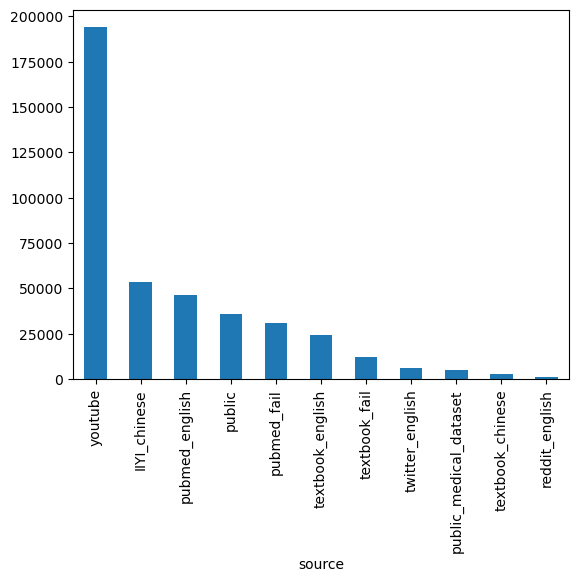

In [9]:
# Image sources
print(df['source'].value_counts())
df['source'].value_counts().plot.bar()

<Axes: xlabel='gender'>

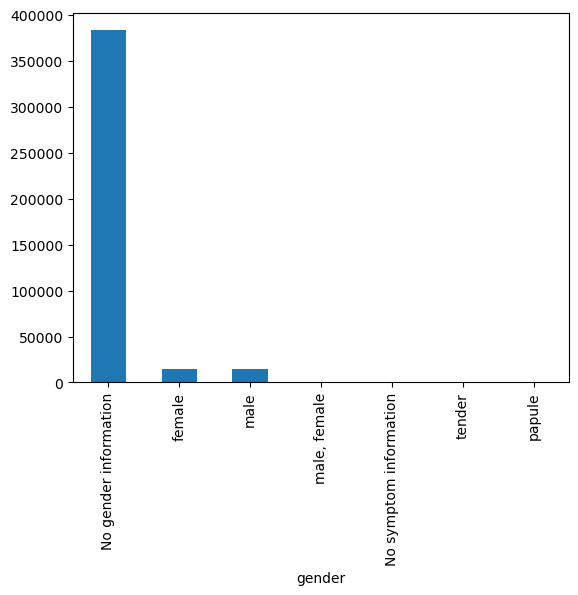

In [10]:
# Gender distribution
df['gender'].value_counts().plot.bar()

In [ ]:
# Folders that should be present
filenames = df['filename']
folders = filenames.str.split('/').apply(lambda x: x[0])  
folders.unique()

array(['IIYI', 'youtube', 'pubmed', 'public', 'reddit', 'twitter', 'edu',
       'note'], dtype=object)

In [ ]:
df[df['filename'].str.contains('reddit')]

,filename,caption,truncated_caption,source,source_type,disease_label,hierarchical_disease_label,skin_concept,body_location,symptoms,age,gender
11,reddit/611_2.png,The poster reports having a rash over their to...,The poster reports having a rash over their to...,reddit_english,forum,"eczema, pityriasis rosea","inflammatory, non-infectious, eczema, pityrias...",No visual concepts,"arm, leg, buttocks",No symptom information,No age information,No gender information
172,reddit/688_2.png,The user recently moved to California and star...,The user recently moved to California and star...,reddit_english,forum,rosacea,"inflammatory, non-infectious, rosacea","pustule, red",nose,No symptom information,No age information,No gender information
575,reddit/169_1.png,Tiny bumps everywhere.,Tiny bumps everywhere.,reddit_english,forum,multiple tiny bumps,multiple tiny bumps,No visual concepts,No body location information,No symptom information,No age information,No gender information
645,reddit/27_1.png,28-year-old female from the USA reports a prog...,28-year-old female from the USA reports a prog...,reddit_english,forum,acne,"inflammatory, non-infectious, acne",No visual concepts,"back, thigh, leg","tender, weeping, exudative, increasing size",28,female
1283,reddit/949_1.png,"The poster is experiencing an itchy, bug bite-...","The poster is experiencing an itchy, bug bite-...",reddit_english,forum,pigmented purpuric eruption,"inflammatory, non-infectious, pigmented purpur...",localized,"back, thigh, leg",tender,No age information,No gender information
...,...,...,...,...,...,...,...,...,...,...,...,...
412078,reddit/561_3.png,A female friend of the poster has a severe ras...,A female friend of the poster has a severe ras...,reddit_english,forum,"insect bite, cellulitis","inflammatory, infectious, parasitic, bacterial...",No visual concepts,neck,tender,No age information,female
412122,reddit/172_1.png,"The user, who has a nevus of Ota around their ...","The user, who has a nevus of Ota around their ...",reddit_english,forum,"hyperpigmentation, post-inflammatory hyperpigm...","reaction patterns and descriptive terms, hyper...",pigmentation,No body location information,No symptom information,No age information,No gender information
412422,reddit/138_1.png,A possibly concerning mole.,A possibly concerning mole.,reddit_english,forum,"dysplastic nevus, nevus","proliferations, benign, melanocytic, dysplasti...",No visual concepts,No body location information,No symptom information,No age information,No gender information
412983,reddit/67_4.png,The user reports that they experienced a break...,The user reports that they experienced a break...,reddit_english,forum,post-inflammatory hypopigmentation,"reaction patterns and descriptive terms, hyper...",erythema,No body location information,No symptom information,No age information,No gender information


In [ ]:
# Dermoscopy related rows
df_dermascope = df[df.select_dtypes(include=['object']).apply(
    lambda x: x.astype(str).str.contains(r'\bdermosc\w*', case=False, na=False, regex=True)
).any(axis=1)]
df_dermascope.shape

(21606, 12)

Notes:
- Where are the reddit images?
- Need to remove dermoscopic images (e.g. MSKCC)

In [ ]:
# missing data
print(df.isnull().sum().to_string())

filename                          0
caption                           0
truncated_caption                 0
source                            0
source_type                       0
disease_label                     0
hierarchical_disease_label    65122
skin_concept                      0
body_location                     0
symptoms                          0
age                               0
gender                            0


In [ ]:
# # of labels
df_disease_count = df['disease_label'].value_counts()
print(f'{len(df_disease_count)} diseases present')
print(df_disease_count)


22708 diseases present
disease_label
no definitive diagnosis                           102380
allergic contact dermatitis                        47510
irritated seborrheic keratosis (from "sk/isk")     15906
psoriasis                                          13794
nevus                                               8706
                                                   ...  
post-procedural changes                                1
vertex leprosy                                         1
acute granulomatous inflammation                       1
post-pterogen effluvium                                1
condyloma, condyloma acuminatum, nevus                 1
Name: count, Length: 22708, dtype: int64


In [ ]:
# are compound labels the issue?
labels = df['disease_label'].unique().tolist()

for i, label in enumerate(labels):
    label = label.split(',')
    labels[i] = [disease.strip() for disease in label]

labels_collapsed = []
for label_list in labels:
    for label in label_list:
        labels_collapsed.append(label)

print(len(set(labels_collapsed)))

20272


In [ ]:
import json
labels = df['disease_label'].unique().tolist()

with open('Derm1M/ontology.json', 'r') as file:
    ontology = json.load(file)

ontology_terms = []
for key, values in ontology.items():
    ontology_terms.append(key.lower())
    for value in values:
        ontology_terms.append(value.lower())

label_terms = []
for i, label in enumerate(labels):
    label = str(label)
    label_split = label.split(',')
    for term in label_split:
        term = term.strip().lower()
        label_terms.append(term)

label_terms_set = set(label_terms)
ontology_terms_set = set(ontology_terms)
print(len(label_terms_set))
print(len(ontology_terms_set))
print(len(label_terms_set.symmetric_difference(ontology_terms_set)))

20272
370
20022


In [ ]:
# standardized labels in the concepts file?
df_concept = pd.read_csv('Derm1M/concept.csv')
print(df_concept.shape)

df_disease_count = df_concept['disease_label'].value_counts()
print(f'{len(df_disease_count)} diseases present')

labels = df_concept['disease_label'].unique().tolist()
for i, label in enumerate(labels):
    label = label.split(',')
    labels[i] = [disease.strip() for disease in label]

labels_collapsed = []
for label_list in labels:
    for label in label_list:
        labels_collapsed.append(label)

print(len(set(labels_collapsed)))

(209613, 3)
11873 diseases present
10499


In [ ]:
# is it in hierarchcial disease labels??
import json
labels = df['hierarchical_disease_label'].unique().tolist()

with open('Derm1M/ontology.json', 'r') as file:
    ontology = json.load(file)

ontology_terms = []
for key, values in ontology.items():
    ontology_terms.append(key.lower())
    for value in values:
        ontology_terms.append(value.lower())

label_terms = []
for i, label in enumerate(labels):
    label = str(label)
    label_split = label.split(',')
    for term in label_split:
        term = term.strip().lower()
        label_terms.append(term)

label_terms_set = set(label_terms)
ontology_terms_set = set(ontology_terms)
print(len(label_terms_set))
print(len(ontology_terms_set))
print(label_terms_set.intersection(ontology_terms_set))

20365
370
{'sand-worm eruption', 'porphyria', 'infected eczema', 'amyloidosis', 'pustular psoriasis', 'scar', 'bullous pemphigoid', 'stevens-johnson syndrome', 'chondrodermatitis nodularis helicis', 'cheilitis', 'paronychia', 'polymorphic eruption of pregnancy', 'lymphangioma', 'skin and soft tissue atypical mycobacterial infection', 'parapsoriasis', 'xeroderma pigmentosum', 'inflammatory dermatosis', 'actinic granuloma', 'melanin pigmentation due to exogenous substance', 'skin diseases caused by warts', 'scleromyxedema', 'contact dermatitis caused by rhus diversiloba', 'urticarial vasculitis', 'annular erythema', "bowen's disease", 'dyshidrosiform eczema', 'palmoplantar pustulosis', 'viral exanthem', 'koilonychia', 'cutaneous sarcoidosis', 'alopecia mucinosa', 'hereditary', 'melanocytic', 'eruptive xanthoma', 'milia', 'kerion', 'tuberous sclerosis', 'physical', 'autoimmune dermatitis', 'tinea versicolor', "crowe's sign", 'lichen striatus', 'localized cutaneous vasculitis', 'organoid n

In [ ]:
# # of unclassified images
num_unclassified = len(df[df['disease_label'] == 'no definitive diagnosis'])
print(f'{num_unclassified} unclassified images')
print(f'{round(num_unclassified/len(df)*100, 2)}% of images unclassified')

102380 unclassified images
24.78% of images unclassified


In [ ]:
df[df['disease_label'] == 'no definitive diagnosis'].head()

,filename,caption,truncated_caption,source,source_type,disease_label,hierarchical_disease_label,skin_concept,body_location,symptoms,age,gender
1,youtube/ykOs8g7zjDc_frame_1135_15.jpg,This image discusses natural treatments and ho...,This image discusses natural treatments and ho...,youtube,edu,no definitive diagnosis,no definitive diagnosis,No visual concepts,lips,No symptom information,No age information,No gender information
13,pubmed/1c_0e_PMC7547347_CRIOPM2020_8827074.005...,The patient at 3-month follow-up.,The patient at 3-month follow-up.,pubmed_english,knowledge,no definitive diagnosis,NaN,No visual concepts,No body location information,No symptom information,No age information,No gender information
14,pubmed/ec_70_PMC4055416_oed_6_2014_027f2.png,Eviscerated right eye six week after surgery.,Eviscerated right eye six week after surgery.,pubmed_english,knowledge,no definitive diagnosis,NaN,No visual concepts,eye,No symptom information,No age information,No gender information
15,pubmed/b4_f8_PMC4184053_gox_1_1h_g004.png,The picture shows the complete closure of the ...,The picture shows the complete closure of the ...,pubmed_english,knowledge,no definitive diagnosis,NaN,ulcer,No body location information,No symptom information,No age information,No gender information
17,pubmed/5c_46_PMC5903051_IJD_63_176_g004.png,Widened wrist,Widened wrist,pubmed_english,knowledge,no definitive diagnosis,NaN,No visual concepts,wrist,No symptom information,No age information,No gender information


Massive problems!
- Image labels are not standardized
    - Paper said they used LLMs to extract 390 classifications
- ~1/4 of the images do not have a classification

(175171, 12)


<Axes: xlabel='source'>

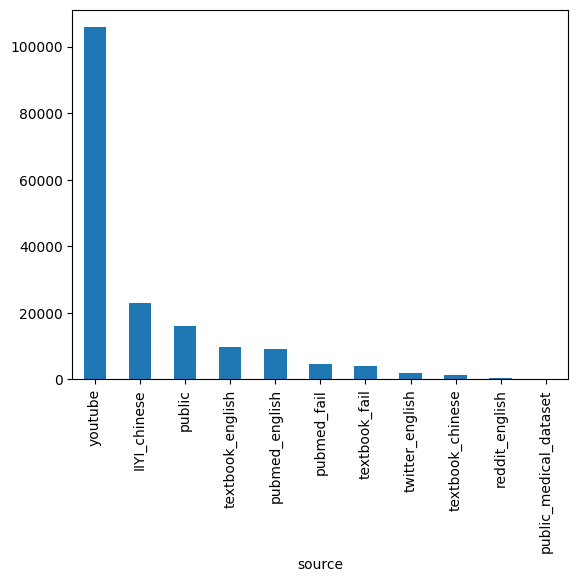

In [ ]:
# Filtered dataset
import json

with open('Derm1M/ontology.json', 'r') as file:
    ontology = json.load(file)

ontology_terms = []
for key, values in ontology.items():
    ontology_terms.append(key.lower())
    for value in values:
        ontology_terms.append(value.lower())
ontology_terms_set = set(ontology_terms)

df_filtered = df[~df.select_dtypes(include=['object']).apply(
    lambda x: x.astype(str).str.contains(r'\bdermosc\w*', case=False, na=False, regex=True)
).any(axis=1)]
labels = (
    df_filtered['hierarchical_disease_label']
    .dropna()
    .apply(lambda x: x.split(',')[-1].strip().lower() if isinstance(x, str) else '')
)
mask = labels.isin(ontology_terms_set)
df_filtered = df.loc[labels.index[mask]]
print(df_filtered.shape)
df_filtered['source'].value_counts().plot.bar()